Mandelbrot set implementation

In [4]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

C:\Users\sacha\AppData\Local\Temp\ipykernel_11492\144063234.py:4: RuntimeWarning: overflow encountered in scalar power
  z = z**2 + c
C:\Users\sacha\AppData\Local\Temp\ipykernel_11492\144063234.py:4: RuntimeWarning: invalid value encountered in scalar power
  z = z**2 + c


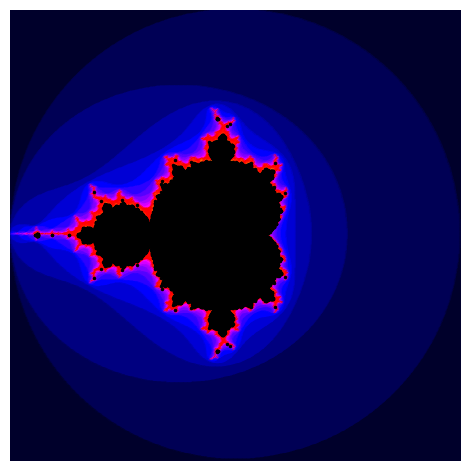

In [13]:
def mandelbrot_check(c, max_iterations):
    z = 0
    for n in range(max_iterations):
        z = z**2 + c
    return abs(z) <= 2

def not_mandelbrot(c, max_iterations):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z**2 + c
        n += 1
    return n

x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
x_grid, y_grid = np.meshgrid(x, y)

complex_grid = x_grid - y_grid * 1j
max_iterations = 300

c_list_in_x = []
c_list_in_y = []

c_list_out_x = []
c_list_out_y = []
color_out = []
for c_row in complex_grid:
    for c in c_row:
        if mandelbrot_check(c, max_iterations):
            c_list_in_x.append(c.real)
            c_list_in_y.append(c.imag)
        else:
            n = not_mandelbrot(c, max_iterations)
            percentage_diverge = (n/max_iterations)*100
            # if n/max_iterations < 0.1:
            #     percentage_diverge = min(n/max_iterations*10,1)
            # else:
            #     percentage_diverge = min(n/max_iterations*30,1)
            c_list_out_x.append(c.real)
            c_list_out_y.append(c.imag)
            color_out.append(percentage_diverge)

# for i in range(len(color_out)):
#     if color_out[i] <= 3:
#         plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,color_out[i]/3))
#     elif color_out[i] <= 6:
#         plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = ((color_out[i]-3)/3,0,1))
#     else:
#         plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (1,(color_out[i]-6)/94,0))

for i in range(len(color_out)):
    if color_out[i] <= 2:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,color_out[i]/2))
    elif color_out[i] <= 4:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = ((color_out[i]-2)/2,0,1))
    else:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (1,(color_out[i]-4)/96,0))
    

plt.plot(c_list_in_x,c_list_in_y, marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,0))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()